# Parallelizing Neural Network Training with TensorFlow

## Creating tensors in TensorFlow

In [1]:
import tensorflow as tf
import numpy as np

np.set_printoptions(precision=3)

In [2]:
a = np.array([1, 2, 3], dtype=np.int32)
b = [4, 5, 6]

In [3]:
t_a = tf.convert_to_tensor(a)
t_b = tf.convert_to_tensor(b)

In [4]:
# print tensors with their properties 
print(t_a)
print(t_b)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor([4 5 6], shape=(3,), dtype=int32)


This resulted in tensors `t_a` and `t_b`, with their properties, `shape=(3,)` and `dtype=int32`, adopted from their source.  Similar to NumPy arrays, we can further see these properties:

In [5]:
t_ones = tf.ones((2, 3))
t_ones.shape

TensorShape([2, 3])

To get access to the values that a tensor refers to, we can simply call the `.numpy()` method on a tensor:

In [6]:
t_ones.numpy()

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

Finally, creating a tensor of constant values can be done as follows:

In [7]:
# create tensor with constant values
const_tensor = tf.constant([1.2, 5, np.pi],
                          dtype=tf.float32)
print(const_tensor)

tf.Tensor([1.2   5.    3.142], shape=(3,), dtype=float32)


## Manipulating the date type and shape of a tensor

The `tf.cast()` function can be used to change the date type of a tensor to a desired type:

In [8]:
# t_cast function can be used to change dtype
t_a_new = tf.cast(t_a, tf.int64)
print(t_a_new.dtype)

<dtype: 'int64'>


In [9]:
# transposing a tensor
t = tf.random.uniform(shape=(3, 5))
t_tr = tf.transpose(t)
print(t.shape, ' --> ', t_tr.shape)

(3, 5)  -->  (5, 3)


In [10]:
# reshaping a tensor (for example, from 1D vector to 2D array)
t = tf.zeros((30,))
t_reshape = tf.reshape(t, shape=(5, 6))
print(t_reshape.shape)

(5, 6)


In [11]:
# removing the unnecessary dimensions (dimensions that have size 1, which are not needed)
t = tf.zeros((1, 2, 1, 4, 1))
t_sqz = tf.squeeze(t, axis=(2, 4))
print(t.shape, ' --> ', t_sqz.shape)

(1, 2, 1, 4, 1)  -->  (1, 2, 4)


## Applying Mathematical Operations to Tensors

First, let's instantiate two random tensors, one with uniform distribution in the range [1, 1) and the othe rwith a standard normal distribution:

In [12]:
tf.random.set_seed(1)

In [13]:
t1 = tf.random.uniform(shape=(5, 2),
                      minval=-1.0, maxval=1.0)

t2 = tf.random.normal(shape=(5, 2), 
                      mean=0.0, stddev=1.0)

Notice that `t1` and `t2` have the same shape.  Now to compute the element-wise product of `t1` and `t2`, we can use the following:

In [14]:
t3 = tf.multiply(t1, t2).numpy()
print(t3)

[[-0.27  -0.874]
 [-0.017 -0.175]
 [-0.296 -0.139]
 [-0.727  0.135]
 [-0.401  0.004]]


To compute the mean, sum, and standard deviation along a certain axis (or axes), we can use `tf.math.reduce_mean()`, `tf.math.reduce_sum()`, and `tf.math.reduce_std()`.  For example, the mean of each column in `t1` can be computed as follows:

In [15]:
t4 = tf.math.reduce_mean(t1, axis=0)
print(t4)

tf.Tensor([0.09  0.207], shape=(2,), dtype=float32)


The matrix-matrix product between `t1` and `t2` (that is, *`t1 x t2`*, where the superscript `T` is for transpose) can be computed by using the `tf.linalg.matmul()` function as follows:

In [16]:
t5 = tf.linalg.matmul(t1, t2, transpose_b=True)
print(t5)

tf.Tensor(
[[-1.144  1.115 -0.87  -0.321  0.856]
 [ 0.248 -0.191  0.25  -0.064 -0.331]
 [-0.478  0.407 -0.436  0.022  0.527]
 [ 0.525 -0.234  0.741 -0.593 -1.194]
 [-0.099  0.26   0.125 -0.462 -0.396]], shape=(5, 5), dtype=float32)


On the other hand, computing *`t1 x t2`* is performed by transporting `t1`, resulting in an array of size 2x2:

In [17]:
t6 = tf.linalg.matmul(t1, t2, transpose_a=True)
print(t6.numpy())

[[-1.711  0.302]
 [ 0.371 -1.049]]


Finally the `tf.norm()` function is useful for computing the \\( L^p \\) norm of a tensor.  For example, we can calculate the \\( L^2 \\) norm of `t1` as follows:

In [18]:
# useful for computing Lp norm of a tensor
norm_t1 = tf.norm(t1, ord=2, axis=1).numpy()
print(norm_t1)

[1.046 0.293 0.504 0.96  0.383]


To verify that this code snippet computes the \\( L^2 \\) norm of `t1` correctly, you can compare the results with the following NumPy function: `np.sqrt(np.sum(np.square(t1), axis=1))`.

## Split, stack, and concatenate tensors

Providing the number of splits (must be divisible):

In [19]:
tf.random.set_seed(1)
t = tf.random.uniform((6, ))
print(t.numpy())

[0.165 0.901 0.631 0.435 0.292 0.643]


In [20]:
t_splits = tf.split(t, num_or_size_splits=3)
[item.numpy() for item in t_splits]

[array([0.165, 0.901], dtype=float32),
 array([0.631, 0.435], dtype=float32),
 array([0.292, 0.643], dtype=float32)]

In this example, a tensor of size 6 was divided into a list of three tensors each with size 2.

Providing the sizes of different splits:

Alternatively, instead of defining the number of splits, we can also specify the sizes of the output tensors directly.  Here we are spliiting a tensor of size 5 into tensors of sizes 3 and 2:

In [21]:
tf.random.set_seed(1)
t = tf.random.uniform((5, ))
print(t.numpy())

[0.165 0.901 0.631 0.435 0.292]


Sometimes, we are working with multiple tensors and need to concatenate or stack them to create a single tensor.  In this case, TensorFlow functions such as `tf.stack()` and `tf.concat()` come in handy.  For example, let's create a 1D tensor, `A`, containing 1s with size 3 and a 1D tensor, `B`, containing 0s with size 0s with size 2 and concatenate them into a 1D tensor, `C`, of size 5:

In [22]:
t_splits = tf.split(t, num_or_size_splits=[3, 2])
[item.numpy() for item in t_splits]

[array([0.165, 0.901, 0.631], dtype=float32),
 array([0.435, 0.292], dtype=float32)]

In [23]:
A = tf.ones((3, ))
B = tf.zeros((2, ))
C = tf.concat([A, B], axis=0)
print(C.numpy())

[1. 1. 1. 0. 0.]


If we create a 1D tensors `A` and `B`, both with size 3, then we can stack them together to form a 2D tensor, S:

In [24]:
A = tf.ones((3, ))
B = tf.zeros((3, ))
S = tf.stack([A, B], axis=1)
print(S.numpy())

[[1. 0.]
 [1. 0.]
 [1. 0.]]


## Creating a TensorFlow Dataset From Exisiting Tensors

Consider the following code, which creates a dataset from a list of values:

In [25]:
a = [1.2, 3.4, 7.5, 4.1, 5.0, 1.0]
ds = tf.data.Dataset.from_tensor_slices(a)
print(ds)

<TensorSliceDataset shapes: (), types: tf.float32>


We can easily iterate through a dataset entry by entry as follows:

In [26]:
for item in ds:
    print(item)

tf.Tensor(1.2, shape=(), dtype=float32)
tf.Tensor(3.4, shape=(), dtype=float32)
tf.Tensor(7.5, shape=(), dtype=float32)
tf.Tensor(4.1, shape=(), dtype=float32)
tf.Tensor(5.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


If we want to create batches from this dataset, with a desired batch size of 3, we can do this as follows:

In [27]:
ds_batch = ds.batch(3)
for i, elem in enumerate(ds_batch, 1):
    print('batch {}:'.format(i), elem.numpy())

batch 1: [1.2 3.4 7.5]
batch 2: [4.1 5.  1. ]


## Combining Two Tensors into a Joint Dataset

Assume that we have two tensors, `t_x` and `t_y`.  Tensor `t_x` holds our feature values, each of 3, and `t_y` stores the class labels.  For this example, we first create these two tensors as follows:

In [28]:
tf.random.set_seed(1)
t_x = tf.random.uniform([4, 3], dtype=tf.float32)
t_y = tf.range(4)

Now, we want to create a joint dataset from these two tensors.  Note that there is a required one-to-one correspondence between the elements of these two tensors:

In [29]:
ds_x = tf.data.Dataset.from_tensor_slices(t_x)
ds_y = tf.data.Dataset.from_tensor_slices(t_y)

ds_joint = tf.data.Dataset.zip((ds_x, ds_y))
for example in ds_joint:
    print('x:', example[0].numpy(),
          '  y:', example[1].numpy())

x: [0.165 0.901 0.631]   y: 0
x: [0.435 0.292 0.643]   y: 1
x: [0.976 0.435 0.66 ]   y: 2
x: [0.605 0.637 0.614]   y: 3


Here, we first created two separate datasets, namely `ds_x` and `ds_y`.  We then used the `zip` function to form a joint dataset.  Alternatively, we can create the joint dataset using `tf.data.Datset.from_tensor_slices()` as follows:

In [30]:
ds_joint = tf.data.Dataset.from_tensor_slices((t_x, t_y))
for example in ds_joint:
    print('x:', example[0].numpy(),
          '  y:', example[1].numpy())

x: [0.165 0.901 0.631]   y: 0
x: [0.435 0.292 0.643]   y: 1
x: [0.976 0.435 0.66 ]   y: 2
x: [0.605 0.637 0.614]   y: 3


Next, we will see how to apply transformation to each individual element of a dataset.  For this, we will use the previous `ds_joint` dataset and apply feature-scaling to scale the values to the range [-1, 1), as currently the values ot `t_x` are in the range [0, 1) based on random uniform distribution:

In [31]:
ds_trans = ds_joint.map(lambda x, y: (x*2-1.0, y))
for example in ds_trans:
    print('x:', example[0].numpy(),
          '  y:', example[1].numpy())

x: [-0.67   0.803  0.262]   y: 0
x: [-0.131 -0.416  0.285]   y: 1
x: [ 0.952 -0.13   0.32 ]   y: 2
x: [0.21  0.273 0.229]   y: 3


Applying this sort of transformation can be used for a user-defined function.

## Shuffle, batch, and repeat

First, let's create a shuffled version from the `ds_joint` dataset:

In [32]:
tf.random.set_seed(1)
ds = ds_joint.shuffle(buffer_size=len(t_x))
for example in ds:
    print('x:', example[0].numpy(),
          '  y:', example[1].numpy())

x: [0.976 0.435 0.66 ]   y: 2
x: [0.435 0.292 0.643]   y: 1
x: [0.165 0.901 0.631]   y: 0
x: [0.605 0.637 0.614]   y: 3


You'll recall that dividing a dataset into batches for model training by calling the `.batch()` method.  Now, let's create such batches from the `ds_joint` dataset and take a look at what a batch looks like:

In [33]:
ds = ds_joint.batch(batch_size=3,
                   drop_remainder=False)
batch_x, batch_y = next(iter(ds))
print('Batch-x:\n', batch_x.numpy())

Batch-x:
 [[0.165 0.901 0.631]
 [0.435 0.292 0.643]
 [0.976 0.435 0.66 ]]


In [34]:
print('Batch-y: ', batch_y.numpy())

Batch-y:  [0 1 2]


In addition, when training a model for multiple epochs, we need to shuffle and iterate over the datset by the desired number of epochs.  So, let's repeat the batched dataset twice:

In [35]:
ds = ds_joint.batch(3).repeat(count=2)
for i, (batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (3, 3) [0 1 2]
1 (1, 3) [3]
2 (3, 3) [0 1 2]
3 (1, 3) [3]


This results in two copies of each batch.  If we change the order of these two operations, that is, first batch and then repeat, the results will be different:

In [36]:
ds = ds_joint.repeat(count=2).batch(3)
for i, (batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (3, 3) [0 1 2]
1 (3, 3) [3 0 1]
2 (2, 3) [2 3]


Let's experiment with them in different orders.

In [37]:
## Order 1: shuffle -> batch -> repeat
tf.random.set_seed(1)
ds = ds_joint.shuffle(4).batch(2).repeat(3)
for i, (batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [2 1]
1 (2, 3) [0 3]
2 (2, 3) [0 3]
3 (2, 3) [1 2]
4 (2, 3) [3 0]
5 (2, 3) [1 2]


In [38]:
## Order 2: batch -> shuffle -> repeat
tf.random.set_seed(1)
ds = ds_joint.batch(2).shuffle(4).repeat(3)
for i, (batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [0 1]
1 (2, 3) [2 3]
2 (2, 3) [0 1]
3 (2, 3) [2 3]
4 (2, 3) [2 3]
5 (2, 3) [0 1]


## Create a dataset from files on your local storage disk

In [39]:
import pathlib

In [40]:
imgdir_path = pathlib.Path('../Data/cat_dog_images')
file_list = sorted([str(path) for path in
                   imgdir_path.glob('*.jpg')])
print(file_list)

['..\\Data\\cat_dog_images\\cat-01.jpg', '..\\Data\\cat_dog_images\\cat-02.jpg', '..\\Data\\cat_dog_images\\cat-03.jpg', '..\\Data\\cat_dog_images\\dog-01.jpg', '..\\Data\\cat_dog_images\\dog-02.jpg', '..\\Data\\cat_dog_images\\dog-03.jpg']


Next, we will visualize these image examples using Matplotlib:

In [41]:
import matplotlib.pyplot as plt
import os

Image shape:  (900, 1200, 3)
Image shape:  (900, 1200, 3)
Image shape:  (900, 742, 3)
Image shape:  (800, 1200, 3)
Image shape:  (800, 1200, 3)
Image shape:  (900, 1200, 3)


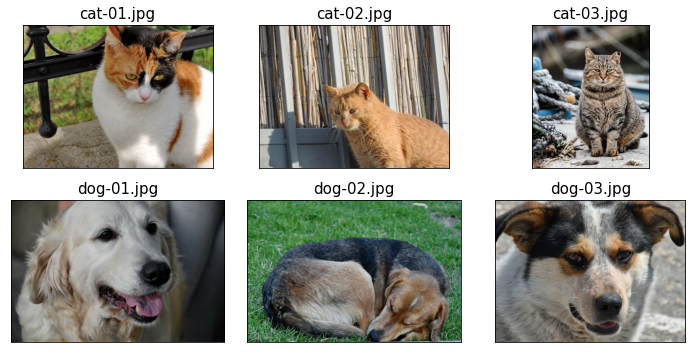

In [42]:
fig = plt.figure(figsize=(10, 5))
for i, file in enumerate(file_list):
    img_raw = tf.io.read_file(file)
    img = tf.image.decode_image(img_raw)
    print('Image shape: ', img.shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)
plt.tight_layout()
plt.show()

Another point to consider is that the labels for these images are provided within their filenames.  So, we extract these labels from the list of filename, assigning label 1 to dogs and label 0 to cats:

In [43]:
labels = [1 if 'dog' in os.path.basename(file) else 0 for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


Now we have two lists: a list of filename and a list of their labels.  In the previous section, you already learned two ways of creating a poitn dataset from two tensors.  Here, we will use the second approad as follows:

In [44]:
ds_files_labels = tf.data.Dataset.from_tensor_slices((file_list, labels))

for item in ds_files_labels:
    print(item[0].numpy(), item[1].numpy())

b'..\\Data\\cat_dog_images\\cat-01.jpg' 0
b'..\\Data\\cat_dog_images\\cat-02.jpg' 0
b'..\\Data\\cat_dog_images\\cat-03.jpg' 0
b'..\\Data\\cat_dog_images\\dog-01.jpg' 1
b'..\\Data\\cat_dog_images\\dog-02.jpg' 1
b'..\\Data\\cat_dog_images\\dog-03.jpg' 1


We now have called this dataset `ds_files_labels`, since it has filenames and labels.  Next, we need to apply transformations to this dataset: load the image content from its file path, decode the raw content, and resize it to a desired size, for example, 80x120.  Previously, we saw how to apply a lambda function using the `.map()` method.  However, since we need to apply multiple preprocessing steps this time, we are going to w rite a helper function instead and use it when calling the `.map()` method:

In [45]:
def load_and_preprocess(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [img_height, img_width])
    image /= 255.0
    return image, label

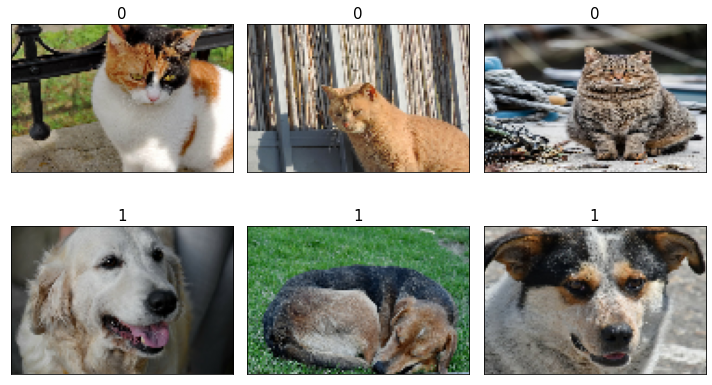

In [46]:
img_width, img_height = 120, 80
ds_images_labels = ds_files_labels.map(load_and_preprocess)

fig = plt.figure(figsize=(10, 6))
for i, example in enumerate(ds_images_labels):
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0])
    ax.set_title('{}'.format(example[1].numpy()),
                 size=15)
plt.tight_layout()
plt.show()

## Fetching Available Datasets from the tensorflow_datasets Library

First, we need to install the `tensorflow_datasets` library via `pip` from the command line:

In [47]:
#pip install tensorflow_datasets

Now, let's import this module and take a look at the list of available datasets:

In [48]:
import tensorflow_datasets as tfds
print(len(tfds.list_builders()))

278


There are two ways of fetching a dataset.  First:

1. Calling the dataset builder function
2. Executing the `download_and_prepare()` method
3. Calling the `as_dataset()` method

Let's work with the first step for the CelebA dataset and print the associated description that is provided within the library:

In [49]:
celeba_bldr = tfds.builder('celebA')
print(celeba_bldr.info.features)

FeaturesDict({
    'attributes': FeaturesDict({
        '5_o_Clock_Shadow': tf.bool,
        'Arched_Eyebrows': tf.bool,
        'Attractive': tf.bool,
        'Bags_Under_Eyes': tf.bool,
        'Bald': tf.bool,
        'Bangs': tf.bool,
        'Big_Lips': tf.bool,
        'Big_Nose': tf.bool,
        'Black_Hair': tf.bool,
        'Blond_Hair': tf.bool,
        'Blurry': tf.bool,
        'Brown_Hair': tf.bool,
        'Bushy_Eyebrows': tf.bool,
        'Chubby': tf.bool,
        'Double_Chin': tf.bool,
        'Eyeglasses': tf.bool,
        'Goatee': tf.bool,
        'Gray_Hair': tf.bool,
        'Heavy_Makeup': tf.bool,
        'High_Cheekbones': tf.bool,
        'Male': tf.bool,
        'Mouth_Slightly_Open': tf.bool,
        'Mustache': tf.bool,
        'Narrow_Eyes': tf.bool,
        'No_Beard': tf.bool,
        'Oval_Face': tf.bool,
        'Pale_Skin': tf.bool,
        'Pointy_Nose': tf.bool,
        'Receding_Hairline': tf.bool,
        'Rosy_Cheeks': tf.bool,
        'Sidebu

In [50]:
print(celeba_bldr.info.features['image'])

Image(shape=(218, 178, 3), dtype=tf.uint8)


In [51]:
print(celeba_bldr.info.features['attributes'].keys())

dict_keys(['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young'])


In [52]:
print(celeba_bldr.info.citation)

@inproceedings{conf/iccv/LiuLWT15,
  added-at = {2018-10-09T00:00:00.000+0200},
  author = {Liu, Ziwei and Luo, Ping and Wang, Xiaogang and Tang, Xiaoou},
  biburl = {https://www.bibsonomy.org/bibtex/250e4959be61db325d2f02c1d8cd7bfbb/dblp},
  booktitle = {ICCV},
  crossref = {conf/iccv/2015},
  ee = {http://doi.ieeecomputersociety.org/10.1109/ICCV.2015.425},
  interhash = {3f735aaa11957e73914bbe2ca9d5e702},
  intrahash = {50e4959be61db325d2f02c1d8cd7bfbb},
  isbn = {978-1-4673-8391-2},
  keywords = {dblp},
  pages = {3730-3738},
  publisher = {IEEE Computer Society},
  timestamp = {2018-10-11T11:43:28.000+0200},
  title = {Deep Learning Face Attributes in the Wild.},
  url = {http://dblp.uni-trier.de/db/conf/iccv/iccv2015.html#LiuLWT15},
  year = 2015
}


This provides some useful information to understand the structure of this dataset.  The features are stored as a dictionary with three keys: `'image'`, `'landmarks'`, and `'attributes'`.

Next, we will call the `download_and_prepare()` method.  This will download the data and store it on disk in a designated folder for all TensorFlow datasets.

In [57]:
celeba_bldr.download_and_prepare()

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

NonMatchingChecksumError: Artifact https://drive.google.com/uc?export=download&id=0B7EVK8r0v71pZjFTYXZWM3FlRnM, downloaded to C:\Users\natha\tensorflow_datasets\downloads\ucexport_download_id_0B7EVK8r0v71pZjFTYXZWM3FlDDaXUAQO8EGH_a7VqGNLRtW52mva1LzDrb-V723OQN8.tmp.8598ba1cf2fa4d1ebba86e792b00bf97\ServiceLogin, has wrong checksum:
* Expected: UrlInfo(size=1.34 GiB, checksum='46fb89443c578308acf364d7d379fe1b9efb793042c0af734b6112e4fd3a8c74', filename='img_align_celeba.zip')
* Got: UrlInfo(size=89.11 KiB, checksum='106093fdd7fc6d9ee9e3c4a1d2d09e0175befc720d024848b533867797be615d', filename='ServiceLogin')
To debug, see: https://www.tensorflow.org/datasets/overview#fixing_nonmatchingchecksumerror

Next we will instantiate the datasets as follows:

In [58]:
datasets = celeba_bldr.as_dataset(shuffle_files=False)
datasets.keys

AssertionError: Dataset celeb_a: could not find data in C:\Users\natha\tensorflow_datasets. Please make sure to call dataset_builder.download_and_prepare(), or pass download=True to tfds.load() before trying to access the tf.data.Dataset object.